# 30 Day Map Challenge

## Day 23 - Movement

Plan: Pliot world flight paths (inspired by [Adam Symington](https://towardsdatascience.com/mapping-the-worlds-flight-paths-with-python-232b9f7271e5))

In [2]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

from shapely.geometry import LineString

Setting the working directory

In [3]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\30 Day Map Challenge Data\\Movement")

Importing airports [data](https://github.com/jpatokal/openflights/blob/master/data/airports.dat)

In [4]:
airports = pd.read_csv("airports.csv", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

In [5]:
airports.head()

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


visualising airport locations

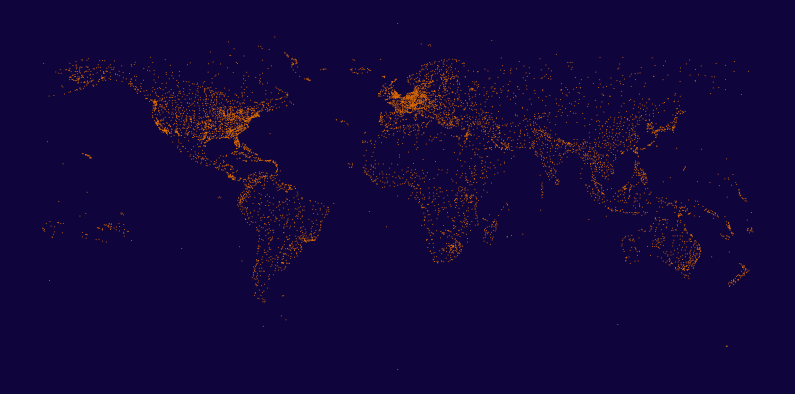

In [6]:
fig, ax = plt.subplots(facecolor='#0f043c')
fig.set_size_inches(14, 7)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none', color="#e26f00")
ax.axis('off')

plt.show()

Importing the routes [data](https://github.com/jpatokal/openflights/blob/master/data/routes.dat)

In [7]:
routes = pd.read_csv("routes.csv", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

creating linestring routes between airports by duplicating the airport dataframe to have sources and destinations, and then merging with routes dataframe

In [8]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [9]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination'],
      dtype='object')


Generating a GeoDataFrame with LineStrings for each route

In [10]:
geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')
routes.head()

,source_airport,destination_airport,name_source,iata_source,icao_source,lat_source,long_source,name_destination,iata_destination,icao_destination,lat_destination,long_destination,geometry
0,AER,KZN,Sochi International Airport,AER,URSS,43.449902,39.956600,Kazan International Airport,KZN,UWKD,55.606201,49.278702,"LINESTRING (39.95660 43.44990, 49.27870 55.60620)"
1,ASF,KZN,Astrakhan Airport,ASF,URWA,46.283298,48.006302,Kazan International Airport,KZN,UWKD,55.606201,49.278702,"LINESTRING (48.00630 46.28330, 49.27870 55.60620)"
2,CEK,KZN,Chelyabinsk Balandino Airport,CEK,USCC,55.305801,61.503300,Kazan International Airport,KZN,UWKD,55.606201,49.278702,"LINESTRING (61.50330 55.30580, 49.27870 55.60620)"
3,DME,KZN,Domodedovo International Airport,DME,UUDD,55.408798,37.906300,Kazan International Airport,KZN,UWKD,55.606201,49.278702,"LINESTRING (37.90630 55.40880, 49.27870 55.60620)"
4,DME,KZN,Domodedovo International Airport,DME,UUDD,55.408798,37.906300,Kazan International Airport,KZN,UWKD,55.606201,49.278702,"LINESTRING (37.90630 55.40880, 49.27870 55.60620)"


Plotting a basic map - earth curvature not accounted for

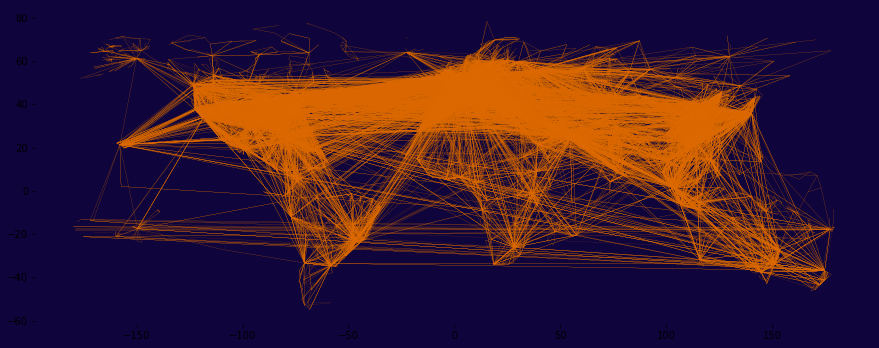

In [11]:
fig = plt.figure(facecolor='#0f043c')
ax = plt.axes()

fig.set_size_inches(15, 15)
ax.patch.set_facecolor('#0f043c')

routes.plot(ax=ax, color='#e26f00', linewidth=0.1)

plt.setp(ax.spines.values(), color='#0f043c')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#0f043c')

plt.show()

Using cartopy to manipulate the linestrings to take into consideration the curvature of the earth

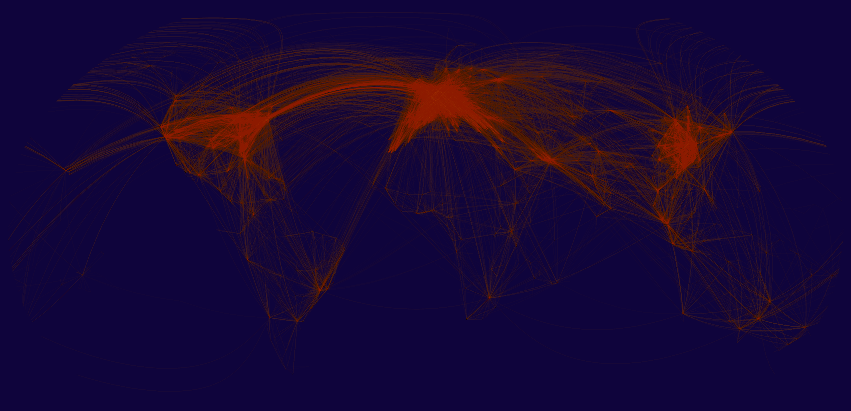

In [14]:
fig = plt.figure(facecolor='#0f043c')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(15, 15)
ax.patch.set_facecolor('#0f043c')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='#e26f00', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='#0f043c')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#0f043c')
ax.set_ylim(-7000000, 8800000)

plt.show()